# L4: Word embeddings

# Omkar Bhutra (omkbh878)

In this lab you will explore word embeddings. A **word embedding** is a mapping of words to points in a vector space such that nearby words (points) are similar in terms of their distributional properties. You will use word embedding to find similar words, and evaluate their usefulness in an inference task.

You will use the word vectors that come with [spaCy](http://spacy.io). Note that you will need the &lsquo;large&rsquo; English language model; the &lsquo;small&rsquo; model that you used in previous labs does not include proper word vectors.

In [6]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [56]:
#!pip install -U spacy download en_core_web_lg
#!pip install -U spacy download en
#import spacy.cli
#spacy.cli.download("en_core_web_lg")

⚠ Skipping model package dependencies and setting `--no-deps`. You don't seem to
have the spaCy package itself installed (maybe because you've built from
source?), so installing the model dependencies would cause spaCy to be
downloaded, which probably isn't what you want. If the model package has other
dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


Every word in the model&rsquo;s vocabulary comes with a 300-dimensional vector, represented as a NumPy array. The following code cell shows how to access the vector for the word *cheese*:

In [7]:
nlp.vocab["cheese"].vector

array([-5.5252e-01,  1.8894e-01,  6.8737e-01, -1.9789e-01,  7.0575e-02,
        1.0075e+00,  5.1789e-02, -1.5603e-01,  3.1941e-01,  1.1702e+00,
       -4.7248e-01,  4.2867e-01, -4.2025e-01,  2.4803e-01,  6.8194e-01,
       -6.7488e-01,  9.2401e-02,  1.3089e+00, -3.6278e-02,  2.0098e-01,
        7.6005e-01, -6.6718e-02, -7.7794e-02,  2.3844e-01, -2.4351e-01,
       -5.4164e-01, -3.3540e-01,  2.9805e-01,  3.5269e-01, -8.0594e-01,
       -4.3611e-01,  6.1535e-01,  3.4212e-01, -3.3603e-01,  3.3282e-01,
        3.8065e-01,  5.7427e-02,  9.9918e-02,  1.2525e-01,  1.1039e+00,
        3.6678e-02,  3.0490e-01, -1.4942e-01,  3.2912e-01,  2.3300e-01,
        4.3395e-01,  1.5666e-01,  2.2778e-01, -2.5830e-02,  2.4334e-01,
       -5.8136e-02, -1.3486e-01,  2.4521e-01, -3.3459e-01,  4.2839e-01,
       -4.8181e-01,  1.3403e-01,  2.6049e-01,  8.9933e-02, -9.3770e-02,
        3.7672e-01, -2.9558e-02,  4.3841e-01,  6.1212e-01, -2.5720e-01,
       -7.8506e-01,  2.3880e-01,  1.3399e-01, -7.9315e-02,  7.05

## Problem 1: Finding similar words

Your first task is to use the word embeddings to find similar words. More specifically, we ask you to write a function `most_similar` that takes a vector $x$ and returns a list with the 10 most similar entries in spaCy&rsquo;s vocabulary, with similarity being defined by cosine.

**Tip:** spaCy already has a [`most_similar`](https://spacy.io/api/vectors#most_similar) method that you can wrap.

In [13]:
# TODO: Enter your implementation of `most_similar` here
from spacy.vectors import Vectors
import numpy as np
import pandas as pd
def most_similar(query):
    most_similarity = nlp.vocab.vectors.most_similar(np.asarray([query]), n=10,sort=True)
    mostsimilarwords = []
    for i in range(10):
        mostsimilarwords.append(nlp.vocab.strings[most_similarity[0].item(i)])    
    return mostsimilarwords

Test your implementation by running the following code cell, which will print the 10 most similar words for the word *cheese*:

In [6]:
print(" ".join(most_similar(nlp.vocab["cheese"].vector)))
#Since this implementation has no attribute .text and returns a value error due to 'Nonetype'

Cheese CHEESE cheese Cheddar cheddar CHEDDAR BACON Bacon bacon cheeses


In [16]:
from spacy.vectors import Vectors
import numpy as np
import pandas as pd
def most_similar(query):
    word_vector = np.asarray(query.vector.reshape(1,300))
    most_similarity = nlp.vocab.vectors.most_similar(word_vector
                                                     ,n=10,sort=True)
    mostsimilarwords = []
    for i in nlp.vocab.vectors.find(rows=list(most_similarity[1][0])):
        mostsimilarwords.append(nlp.vocab[i])
    return mostsimilarwords  

In [37]:
print(" ".join(w.text for w in most_similar(nlp.vocab["cheese"])))

Cheese CHEESE cheese Cheddar cheddar CHEDDAR BACON Bacon bacon cheeses


You should get the following output:

Once you have a working implementation of `most_similar`, use it to think about in what sense the returned words really are &lsquo;similar&rsquo; to the cue word. Try to find examples where the cue word and at least one of the words returned by `most_similar` are in the following semantic relations:

1. synonymy (exchangeable meanings)
2. antonymy (opposite meanings)
3. hyperonymy/hyponymy (more specific/less specific meanings)

Document your examples in the code cell below.

In [14]:
# Hyperonymy is observed from the output between the words 'cheese' and 'cheddar' where 'cheddar'
# is a type of cheese. 
print(" ".join(most_similar(nlp.vocab["cheddar"].vector)))
# Shows that most returned words are a type of cheese such as 
#'mozzarella' and 'parmesan'

Cheddar cheddar CHEDDAR cheese Cheese CHEESE mozzarella Mozzarella MOZZARELLA parmesan


In [43]:
print(" ".join(w.text for w in most_similar(nlp.vocab["queen"])))
#Antonymy is evident from king and queen being return together

queen Queen QUEEN queens Queens QUEENS king KIng KING King


In [18]:
print(" ".join(w.text for w in most_similar(nlp.vocab["cat"])))
# Synonymy is observed from only cats and kitten being returned 

CAT Cat cat CATs CATS cats Cats KITTEN Kitten kitten


## Problem 2: Plotting similar words

Your next task is to visualize the word embedding space by a plot. To do so, you will have to reduce the dimensionality of the space from 300 to 2&nbsp;dimensions. One suitable algorithm for this is [T-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (TSNE), which is implemented in scikit-learn&rsquo;s [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class.

Write a function `plot_most_similar` that takes a list of words (lexemes) and does the following:

1. For each word in the list, find the most similar words (lexemes) in the spaCy vocabulary.
2. Compute the TSNE transformation of the corresponding vectors to 2&nbsp;dimensions.
3. Produce a scatter plot of the transformed vectors, with the vectors as points and the corresponding word forms as labels.

In [123]:
# TODO: Write code here to plot the most similar words
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_most_similar(lexemes):
    text_array = []
    most_similar_words = []
    dist_X_array = []
    dist_X_array_words = []
    labels = []
    for word in lexemes:
        text_array.append(word.text)
        most_similar_words = most_similar(word)
        X = np.array([w.vector for w in most_similar_words])
        dist_X_array.append(X)
        for i in X:
            dist_X_array_words.append(i)
    for j in range(len(dist_X_array)):
        for k in range(len(dist_X_array[j])):
            labels.append(text_array[j])        
    X_embedded = TSNE(n_components=2).fit_transform(dist_X_array_words)
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(X_embedded[:,0],X_embedded[:,1],c=np.linspace(0,len(labels)))
    for i in range(len(labels)):
        ax.annotate(labels[i],(X_embedded[i,0],X_embedded[i,1]))
    ax.set_xlabel('Transformed vectors X')
    ax.set_ylabel('Transformed vectors Y')
    ax.set_title('Scatter plot')
    return plt.show()

Test your code by running the following cell:

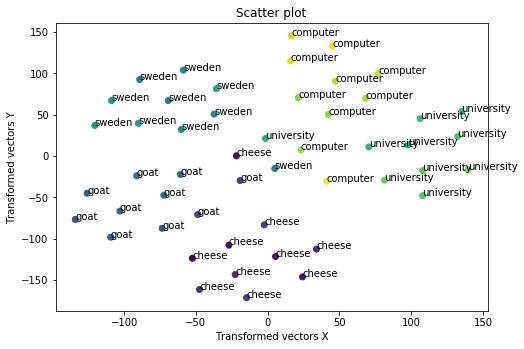

In [125]:
plot_most_similar(nlp.vocab[w] for w in ["cheese", "goat", "sweden", "university", "computer"])

## Problem 3: Analogies

In a **word analogy task** you are given three words $x$, $y$, $z$ and have to predict a word $w$ that has the same semantic relation to $z$ as $y$ has to $x$. One example is *man*, *woman*, *brother*, the expected answer being *sister* (the semantic relation is *male*/*female*).

[Mikolov et al. (2013)](http://www.aclweb.org/anthology/N13-1090) have shown that word analogy tasks can be solved by adding and substracting word vectors in a word embedding: the vector for *sister* is the closest vector (in terms of cosine distance) to the vector *brother* $-$ *man* $+$ *woman*. Your next task is to write a function `fourth` that takes in three words (say *brother*, *man*, *woman*) and predicts the word that completes the analogy (in this case, *sister*).

In [160]:
# TODO: Enter code here to solve the analogy problem
def semantic_prediction(pred_vector, xyz):
    pred = []
    mostsimilarword = []
    most_similarity = nlp.vocab.vectors.most_similar(np.asarray([pred_vector]), n=10,sort=True)
    for i in nlp.vocab.vectors.find(rows=list(most_similarity[1][0])):
        pred.append(nlp.vocab[i].text)
        if(pred not in xyz):
            mostsimilarword = nlp.vocab[i]
            return mostsimilarword  
    
def fourth(x,y,z):
    x_vector = x.vector
    y_vector = y.vector
    z_vector = z.vector
    predicted_vector = z_vector - y_vector + x_vector
    predicted_word = semantic_prediction(predicted_vector, [x,y,z])
    return predicted_word

Test your code by running the following code. You should get *sister*.

In [161]:
fourth(nlp.vocab["brother"], nlp.vocab["man"], nlp.vocab["woman"]).text

'SISTER'

You should also be able to get the following:

* *Stockholm* $-$ *Sweden* $+$ *Germany* $=$ *Berlin*
* *Swedish* $-$ *Sweden* $+$ *France* $=$ *French*
* *better* $-$ *good* $+$ *bad* $=$ *worse*
* *walked* $-$ *walk* $+$ *take* $=$ *took*

Experiment with other examples to see whether you get the expected output. Provide three examples of analogies for which the model produces the &lsquo;correct&rsquo; answer, and three examples on which the model &lsquo;failed&rsquo;. Based on your theoretical understanding of word embeddings, do you have a hypothesis as to why the model succeeds/fails in completing the analogy? Discuss this question in a short text.

In [162]:
fourth(nlp.vocab["Stockholm"], nlp.vocab["Sweden"], nlp.vocab["Germany"]).text

'Berlin'

In [163]:
fourth(nlp.vocab["Swedish"], nlp.vocab["Sweden"], nlp.vocab["France"]).text

'French'

In [164]:
fourth(nlp.vocab["better"], nlp.vocab["good"], nlp.vocab["bad"]).text

'WORSE'

In [165]:
fourth(nlp.vocab["walked"], nlp.vocab["walk"], nlp.vocab["take"]).text

'TOOK'

In [182]:
#*TODO: Insert your examples and your discussion here*
fourth(nlp.vocab["economist"], nlp.vocab["economics"], nlp.vocab["science"]).text
#Success

'Scientist'

In [183]:
fourth(nlp.vocab["economist"], nlp.vocab["economics"], nlp.vocab["policy"]).text
#Failure, we were expecting 'politician' to be returned.

'Economist'

In [246]:
fourth(nlp.vocab["dog"], nlp.vocab["puppy"], nlp.vocab["kitten"]).text
#Success

'Cat'

In [247]:
fourth(nlp.vocab["puppy"], nlp.vocab["dog"], nlp.vocab["cat"]).text
#Failure, we were expected kitten as seen previously.

'puppy'

In [241]:
fourth(nlp.vocab["german"], nlp.vocab["germany"], nlp.vocab["norway"]).text
#Success, we could predict the language used in norway based on what we know is spoken in germany

'Norwegian'

In [245]:
fourth(nlp.vocab["pink"], nlp.vocab["girls"], nlp.vocab["boys"]).text
# Failure to predict the stereotype of favorite color by gender of children

'pink'

*Similarity is a measure based on cosine distance between the vectors of the words. It is therefore difficult for such a model to capture sociocultural references such as topic popularity and stereotypes. However, semantic relationships are identified based on how close they are in use to the reference words and hence some languages,capitals,subject similar words can be related.*

## Natural language inference dataset

In the second part of this lab, you will be evaluating the usefulness of word embeddings in the context of a natural language inference task. The data for this part is the [SNLI corpus](https://nlp.stanford.edu/projects/snli/), a collection of 570k human-written English image caption pairs manually labeled with the labels *Entailment*, *Contradiction*, and *Neutral*. Consider the following sentence pair as an example:

* Sentence 1: A soccer game with multiple males playing.
* Sentence 2: Some men are playing a sport.

This pair is labeled with *Entailment*, because sentence&nbsp;2 is logically entailed (implied) by sentence&nbsp;1 – if sentence&nbsp;1 is true, then sentence&nbsp;2 is true, too. The following sentence pair, on the other hand, is labeled with *Contradiction*, because both sentences cannot be true at the same time.

* Sentence 1: A black race car starts up in front of a crowd of people.
* Sentence 2: A man is driving down a lonely road.

For detailed information about the corpus, refer to [Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/). For this lab, we load the training portion and the development portion of the dataset.

**Note:** Because the SNLI corpus is rather big, we initially only load a small portion (25,000 samples) of the training data. Once you have working code for Problems&nbsp;4–6, you should set the flag `final` to `True` and re-run all cells with the full dataset.

In [3]:
import bz2
import pandas as pd

final_evaluation = False    # TODO: Set to True for the final evaluation!

with bz2.open("train.jsonl.bz2", 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True)[:25000]
    print("Number of sentence pairs in the training data:", len(df_train))

with bz2.open("dev.jsonl.bz2", 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print("Number of sentence pairs in the development data:", len(df_dev))

Number of sentence pairs in the training data: 25000
Number of sentence pairs in the development data: 9842


When you inspect the data frames, you will see that we have preprocessed the sentences and separated tokens by spaces. In the columns `tagged1` and `tagged2`, we have added the part-of-speech tags for every token (as predicted by spaCy), also separated by spaces.

In [249]:
df_train.head()

,gold_label,sentence1,sentence2,tags1,tags2
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competiti...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,DET NOUN AUX VERB PRON NOUN ADP DET NOUN PUNCT
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner , ordering an omelette .",DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,DET NOUN AUX ADP DET NOUN PUNCT VERB DET NOUN ...
2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors , on a horse .",DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,DET NOUN AUX ADV PUNCT ADP DET NOUN PUNCT
3,neutral,Children smiling and waving at camera,They are smiling at their parents,NOUN VERB CCONJ VERB ADP NOUN,PRON AUX VERB ADP PRON NOUN
4,entailment,Children smiling and waving at camera,There are children present,NOUN VERB CCONJ VERB ADP NOUN,PRON AUX NOUN ADJ


## Problem 4: Two simple baselines

Your first task is to establish two simple baselines for the natural language inference task.

### Random baseline

One drawback with the Most Frequent Class (MFC) baseline is that it does not yield well-defined precision and recall values for all classes. Here we therefore ask you to implement a classifier that generates *random* predictions, where the probability of a class is determined by its relative frequency in the training data. This functionality is provided by scikit-learn&rsquo;s [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Write code to evaluate the performance of this classifier on the development data.

In [265]:
# TODO: Enter code here to implement the random baseline. Print the classification report.
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='stratified', random_state=None, constant=None)
dummy_classifier.fit(df_train.drop(['gold_label'], axis=1),df_train['gold_label'])
print("Training accuracy is"
      ,round((dummy_classifier.score(df_train.drop(['gold_label'], axis=1),df_train['gold_label'])*100),2),"%")
print("Test Accuracy is"
      ,round((dummy_classifier.score(df_dev.drop(['gold_label'], axis=1),df_dev['gold_label'])*100),2),"%")

Training accuracy is 33.76 %
Test Accuracy is 33.9 %


### One-sided baseline

A second obvious baseline for the inference task is to predict the class label of a sentence pair based on the text of only one of the two sentences, just as in a standard document classification task. Put together a simple [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) + [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pipeline that implements this idea, train it, and evaluate it on the development data. Is it better to base predictions on sentence&nbsp;1 or sentence&nbsp;2?

In [333]:
# TODO: Enter code here to implement the one-sentence baselines. Print the classification reports.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

lgr_clf = Pipeline([('vect', CountVectorizer()),
               ('clf', LogisticRegression(),),
              ])

#Training the model
lgr_clf.fit(df_train.sentence1, df_train.gold_label)

#accuracy score on the test data
print("The test data accuracy is"
      ,round(lgr_clf.score(df_dev.sentence1,df_dev.gold_label)*100,2),"% for sentence 1")

#print(classification_report(df_dev.sentence1,df_dev.gold_label))

The test data accuracy is 33.09 % for sentence 1


In [308]:
#Training the model
lgr_clf.fit(df_train.sentence2, df_train.gold_label)

#accuracy score on the test data
print("The test data accuracy is"
      ,round(lgr_clf.score(df_dev.sentence2,df_dev.gold_label)*100,2),"% for sentence 2")

The test data accuracy is 60.35 % for sentence 2


## Problem 5: A classifier based on manually engineered features

[Bowman et al., 2015](https://www.aclweb.org/anthology/D15-1075/) evaluate a classifier that uses (among others) **cross-unigram features**. This term is used to refer to pairs of unigrams $(w_1, w_2)$ such that $w_1$ occurs in sentence&nbsp;1, $w_2$ occurs in sentence&nbsp;2, and both have been assigned the same part-of-speech tag.

Your next task is to implement the cross-unigram classifier. To this end, the next cell contains skeleton code for a transformer that you can use as the first component in a classification pipeline. This transformer converts each row of the SNLI data frame into a space-separated string consisting of

* the standard unigrams (of sentence&nbsp;1 or sentence&nbsp;2 – this depends on your results in Problem&nbsp;4)
* the cross-unigrams, as defined above.

The space-separated string forms a new &lsquo;document&rsquo; that can be passed to a vectorizer in exactly the same way as a standard sentence in Problem&nbsp;4.

In [386]:
from sklearn.base import BaseEstimator, TransformerMixin

class CrossUnigramsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a sentence-tag-sentence-tag quadruple.
    def _transform(self, sentence1, tags1, sentence2, tags2):
        # TODO: Replace the following line with your own code
        words_sentence1 = sentence1.split(' ')
        tags1 = tags1.split(' ')
        words_sentence2 = sentence2.split(' ')
        tags2 = tags2.split(' ')
        
        new_string = sentence2
        for i in range(len(tags1)):
            for j in range(len(tags2)):
                if(tags1[i] == tags2[j]):
                    new_string.join(words_sentence1[i] + ',' + words_sentence2[j])
        return new_string

    def transform(self, X):
        return [self._transform(s1, t1, s2, t2) for s1, t1, s2, t2 in X]

In [387]:
# TODO: Enter code here to implement the cross-unigrams classifier. Print the classification report.

cut_train = CrossUnigramsTransformer().transform(df_train[['sentence1','tags1','sentence2','tags2']].values)
cut_test = CrossUnigramsTransformer().transform(df_dev[['sentence1','tags1','sentence2','tags2']].values)


lgr_mod = Pipeline([('vect', CountVectorizer()),
               ('clf', LogisticRegression(),),
              ])

lgr_mod.fit(cut_train, df_train.gold_label)    
print("The test data accuracy is"
      ,round(lgr_mod.score(cut_test,df_dev.gold_label)*100,2),"%")

The test data accuracy is 60.35 %


Once you have an implementation of the transformer, extend the pipeline that you built for Problem&nbsp;4, train it, and evaluate it on the development data.

## Problem 6: A classifier based on word embeddings

Your last task in this lab is to build a classifier for the natural language inference task that uses word embeddings. More specifically, we ask you to implement a vectorizer that represents each sentence as the sum of its word vectors – a representation known as the **continuous bag-of-words**. Thus, given that spaCy&rsquo;s word vectors have 300 dimensions, each sentence will be transformed into a 300-dimensional vector. To represent a sentence pair, the vectorizer should concatenate the vectors for the individual sentences; this yields a 600-dimensional vector. This vector can then be passed to a classifier.

The next code cell contains skeleton code for the vectorizer. You will have to implement two methods: one that maps a single sentence to a vector (of length 300), and one that maps a sentence pair to a vector (of length 600).

In [4]:
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class PairedSentenceVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a single sentence.
    def _transform1(self, sentence):
        sentence_words = sentence.split(' ')
        continuous_bag_of_words = nlp.vocab[sentence_words[0]].vector.copy()
        for i in range(1,len(sentence_words)):
            continuous_bag_of_words = continuous_bag_of_words + nlp.vocab[sentence_words[i]].vector
        return continuous_bag_of_words
    
    # Vectorize a pair of sentences.
    def _transform2(self, sentence1, sentence2):
        sentence1_vector = self._transform1(sentence1)
        sentence2_vector = self._transform1(sentence2)
        concat_vector = np.concatenate((sentence1_vector, sentence2_vector))
        return concat_vector

    def transform(self, X):
        return np.concatenate(
            [self._transform2(s1, s2).reshape(1, -1) for s1, s2 in X]
        )

Once you have a working implementation, build a pipeline consisting of the new vectorizer and a [multi-layer perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). This more powerful (compared to logistic regression) classifier is called for here because we do not specify features by hand (as we did in Problem&nbsp;5), but want to let the model learn a good representation of the data by itself. Use 3&nbsp;hidden layers, each with size 300. It suffices to train the classifier for 8&nbsp;iterations (epochs).

In [11]:
# TODO: Enter code here to implement the word embeddings classifier. Print the classification report.
from sklearn.neural_network import MLPClassifier
NN_x_train = PairedSentenceVectorizer().transform(df_train.drop(['gold_label', 'tags1', 'tags2'], axis=1).values)
NN_x_test = PairedSentenceVectorizer().transform(df_dev.drop(['gold_label', 'tags1', 'tags2'], axis=1).values)
NN_model = MLPClassifier(hidden_layer_sizes=(300, 300, 300), max_iter=8)
NN_model.fit(NN_x_train, df_train.gold_label)
print("The test accuracy is",round((NN_model.score(NN_x_test, df_dev.gold_label)*100),2),"%")

C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The test accuracy is 63.22 %


## Final evaluation

Once you have working code for all problems, re-run the code for Problems&nbsp;4–6 with the full training data. What are your results? How do they differ from the results that you obtained for the smaller training data? How do you interpret this? Summarize your findings in a short text.

In [13]:
import bz2
import pandas as pd

final_evaluation = True    # TODO: Set to True for the final evaluation!

with bz2.open("train.jsonl.bz2", 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True)[:25000]
    print("Number of sentence pairs in the training data:", len(df_train))

with bz2.open("dev.jsonl.bz2", 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print("Number of sentence pairs in the development data:", len(df_dev))

Number of sentence pairs in the training data: 549367
Number of sentence pairs in the development data: 9842


In [15]:
# TODO: Enter code here to implement the random baseline. Print the classification report.
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='stratified', random_state=None, constant=None)
dummy_classifier.fit(df_train.drop(['gold_label'], axis=1),df_train['gold_label'])
print("Training accuracy is"
      ,round((dummy_classifier.score(df_train.drop(['gold_label'], axis=1),df_train['gold_label'])*100),2),"%")
print("Test Accuracy is"
      ,round((dummy_classifier.score(df_dev.drop(['gold_label'], axis=1),df_dev['gold_label'])*100),2),"%")

Training accuracy is 33.39 %
Test Accuracy is 33.17 %


In [16]:
# TODO: Enter code here to implement the one-sentence baselines. Print the classification reports.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

lgr_clf = Pipeline([('vect', CountVectorizer()),
               ('clf', LogisticRegression(),),
              ])

#Training the model
lgr_clf.fit(df_train.sentence1, df_train.gold_label)

#accuracy score on the test data
print("The test data accuracy is"
      ,round(lgr_clf.score(df_dev.sentence1,df_dev.gold_label)*100,2),"% for sentence 1")

#print(classification_report(df_dev.sentence1,df_dev.gold_label))

C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The test data accuracy is 33.67 % for sentence 1


In [17]:
#Training the model
lgr_clf.fit(df_train.sentence2, df_train.gold_label)

#accuracy score on the test data
print("The test data accuracy is"
      ,round(lgr_clf.score(df_dev.sentence2,df_dev.gold_label)*100,2),"% for sentence 2")

The test data accuracy is 64.9 % for sentence 2


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class CrossUnigramsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a sentence-tag-sentence-tag quadruple.
    def _transform(self, sentence1, tags1, sentence2, tags2):
        # TODO: Replace the following line with your own code
        words_sentence1 = sentence1.split(' ')
        tags1 = tags1.split(' ')
        words_sentence2 = sentence2.split(' ')
        tags2 = tags2.split(' ')
        
        new_string = sentence2
        for i in range(len(tags1)):
            for j in range(len(tags2)):
                if(tags1[i] == tags2[j]):
                    new_string.join(words_sentence1[i] + ',' + words_sentence2[j])
        return new_string

    def transform(self, X):
        return [self._transform(s1, t1, s2, t2) for s1, t1, s2, t2 in X]

In [19]:
# TODO: Enter code here to implement the cross-unigrams classifier. Print the classification report.

cut_train = CrossUnigramsTransformer().transform(df_train[['sentence1','tags1','sentence2','tags2']].values)
cut_test = CrossUnigramsTransformer().transform(df_dev[['sentence1','tags1','sentence2','tags2']].values)


lgr_mod = Pipeline([('vect', CountVectorizer()),
               ('clf', LogisticRegression(),),
              ])

lgr_mod.fit(cut_train, df_train.gold_label)    
print("The test data accuracy is"
      ,round(lgr_mod.score(cut_test,df_dev.gold_label)*100,2),"%")

The test data accuracy is 64.9 %


In [22]:
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class PairedSentenceVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a single sentence.
    def _transform1(self, sentence):
        sentence_words = sentence.split(' ')
        continuous_bag_of_words = nlp.vocab[sentence_words[0]].vector.copy()
        for i in range(1,len(sentence_words)):
            continuous_bag_of_words += nlp.vocab[sentence_words[i]].vector
        return continuous_bag_of_words
    
    # Vectorize a pair of sentences.
    def _transform2(self, sentence1, sentence2):
        sentence1_vector = self._transform1(sentence1)
        sentence2_vector = self._transform1(sentence2)
        concat_vector = np.concatenate((sentence1_vector, sentence2_vector))
        return concat_vector

    def transform(self, X):
        return np.concatenate(
            [self._transform2(s1, s2).reshape(1, -1) for s1, s2 in X]
        )

In [25]:
# TODO: Enter code here to implement the word embeddings classifier. Print the classification report.
from sklearn.neural_network import MLPClassifier
NN_x_train = PairedSentenceVectorizer().transform(df_train.drop(['gold_label', 'tags1', 'tags2'], axis=1).values)
NN_x_test = PairedSentenceVectorizer().transform(df_dev.drop(['gold_label', 'tags1', 'tags2'], axis=1).values)
NN_model = MLPClassifier(hidden_layer_sizes=(300, 300, 300), max_iter=8)
NN_model.fit(NN_x_train, df_train.gold_label)
print("The test accuracy is",round((NN_model.score(NN_x_test, df_dev.gold_label)*100),2),"%")

C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The test accuracy is 76.17 %


*TODO: Insert your discussion of the experimental results here
The total number of sentence pairs in the training data is 549367 pairs and the total number of sentence pairs in the development data remains as 9842, as expected. The random baseline accuracy is marginally reduced as expected while the
one sided baseline is improved. The one sided baseline for sentence 2 is improved from 60% to 65% which is a significant
improvement in accuracy, this is also expected as we now have a much larger training dataset.
The cross unigrams transformer also provides us with a similar improvement in accuracy on the test data which is 64.9%, this is obtained through the tranformation into cross unigrams and then piped through the vectoriser and logistic regression.
The neural network with 3 hidden layers containing 300 nodes each produces 63.22% accuracy when trained 
on the limited data, but when the network is trained on the full data the accuracy vastly improves to 76.17%.*

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>